# EDA Analysis and Visualization of COVID-19 Data

This exercesice aims at answering two questions by using Data about COVID-19 posted by Our World in Data website. These questions are:

1. Plot two separate charts of infected people and deaths in Spain (separately)
2. Plot Top-10 countries bar charts with number of infection cases and deaths (separately)

Data Source: https://ourworldindata.org/coronavirus-source-data

* **NOTE**: In order to provide an up to date version of data, we will be importing the data from the link provided in Our World in Data website under the European Centre for Disease Prevention and Control (ECDC) section. Following the recommendations provided in OWD website, we decided to relly on those data in order to analyse the daily global and national statistics. 

## First steps: Importing and describing Data

In [1]:
# Import the necessary libraries:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Import dataset:

df = pd.read_csv('https://covid.ourworldindata.org/data/ecdc/full_data.csv', parse_dates=["date"])
df

,date,location,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...,...
7991,2020-03-27,Zimbabwe,0,0,3,1
7992,2020-03-28,Zimbabwe,2,0,5,1
7993,2020-03-29,Zimbabwe,2,0,7,1
7994,2020-03-30,Zimbabwe,0,0,7,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 6 columns):
date            7996 non-null datetime64[ns]
location        7996 non-null object
new_cases       7996 non-null int64
new_deaths      7996 non-null int64
total_cases     7996 non-null int64
total_deaths    7996 non-null int64
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 374.9+ KB


In [4]:
df.set_index("date")

,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2019-12-31,Afghanistan,0,0,0,0
2020-01-01,Afghanistan,0,0,0,0
2020-01-02,Afghanistan,0,0,0,0
2020-01-03,Afghanistan,0,0,0,0
2020-01-04,Afghanistan,0,0,0,0
...,...,...,...,...,...
2020-03-27,Zimbabwe,0,0,3,1
2020-03-28,Zimbabwe,2,0,5,1
2020-03-29,Zimbabwe,2,0,7,1


### Analysing variables:

From this first step we can see that the file is a Time Series dataset containing data of the evolution of certain variables related to COVID-19 spread in different countries. After inspecting the variables, we set the column 'Date' as index. Let's examine the variables:

- **date**: Date of the observation taken, ranging from 2019/12/31 to the last day the dataset has been updated. Date formar _(yyyy-mm-dd)_.
- **location**: List of countries with available data, plus global data under the location _'World'_
- **new_cases**: amount of new cases reported on that date
- **new_deaths**: amount of new deaths reported on that date
- **total_cases**: total cases since the start of the outbreak
- **total_deaths**: total deaths since the start of the outbreak

Let's see what's going on with missing values:

## 1. Spain: Infections and Deaths

First, let's filter data related to Spain and set the column 'date' as the Index.

In [5]:
df_spain = df[df.location == "Spain"].set_index("date")
df_spain


,location,new_cases,new_deaths,total_cases,total_deaths
date,,,,,
2019-12-31,Spain,0,0,0,0
2020-01-01,Spain,0,0,0,0
2020-01-02,Spain,0,0,0,0
2020-01-03,Spain,0,0,0,0
2020-01-04,Spain,0,0,0,0
...,...,...,...,...,...
2020-03-27,Spain,8578,655,56188,4089
2020-03-28,Spain,7871,769,64059,4858
2020-03-29,Spain,8189,832,72248,5690


#### Checking for missing values in subset and observing data:

Doing a quick check we can see there are no _null_ values, and the amount of observations are complete.

In [6]:
df_spain.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2019-12-31 to 2020-03-31
Data columns (total 5 columns):
location        92 non-null object
new_cases       92 non-null int64
new_deaths      92 non-null int64
total_cases     92 non-null int64
total_deaths    92 non-null int64
dtypes: int64(4), object(1)
memory usage: 4.3+ KB


### Curve of Daily New Cases in Spain

We will first plot the curve of _New Cases_ in order to see the evolution of the virus spread since the beginning of the outbreak.

In the chart bellow, the  _**blue line**_ represents the beginning of the Official measures to control spread put in place on March 16th.

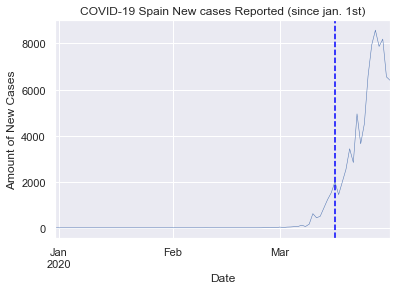

In [7]:
sns.set(rc={'figure.figsize':(6, 4)})

df_spain['new_cases'].plot(linewidth=0.5)
plt.title('COVID-19 Spain New cases Reported (since jan. 1st)')
plt.xlabel('Date')
plt.ylabel('Amount of New Cases')
plt.axvline('2020-03-16', color='blue', linestyle='--')

plt.show()


### Total Cases in Spain

The charts bellow show the curves of Total Cases reported in Spain, both in linear and logaritmic scale since the beginning of the outbreak. Again, the _**red line**_ indicates the day the first measures to contain the outbreak entered into force at National level.

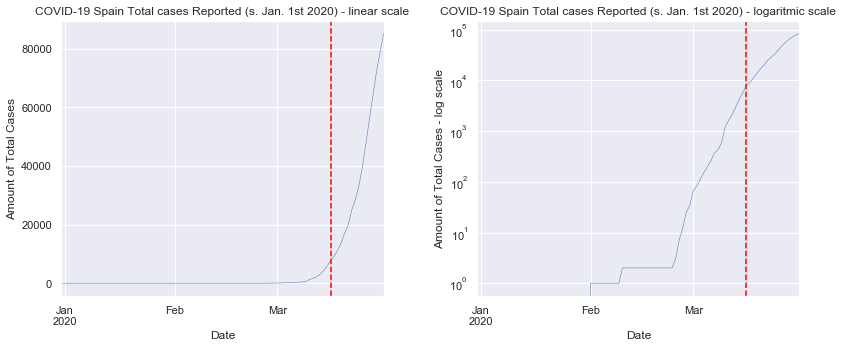

In [8]:
sns.set(rc={'figure.figsize':(12, 5)})

plt.subplot(1, 2, 1)

df_spain['total_cases'].plot(linewidth=0.5)
plt.title('COVID-19 Spain Total cases Reported (s. Jan. 1st 2020) - linear scale', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Amount of Total Cases')
plt.axvline('2020-03-16', color='red', linestyle='--')

plt.subplot(1, 2, 2)

df_spain['total_cases'].plot(linewidth=0.5)
plt.title('COVID-19 Spain Total cases Reported (s. Jan. 1st 2020) - logaritmic scale', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Amount of Total Cases - log scale')
plt.axvline('2020-03-16', color='red', linestyle='--')
plt.yscale('log')

plt.tight_layout()
plt.show()

### Total Deaths in Spain

The charts bellow show the curves of Total Deaths reported in Spain, both in linear and logaritmic scale since the beginning of the outbreak. Again, the _**red line**_ indicates the day the first measures to contain the outbreak entered into force at National level.

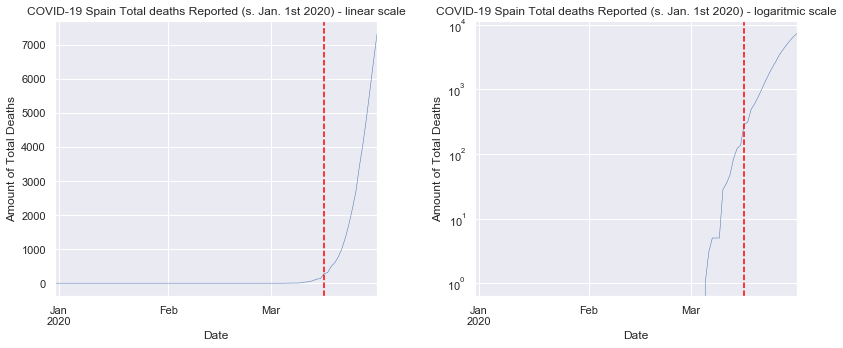

In [9]:
sns.set(rc={'figure.figsize':(12, 5)})

plt.subplot(1, 2, 1)

df_spain['total_deaths'].plot(linewidth=0.5)
plt.title('COVID-19 Spain Total deaths Reported (s. Jan. 1st 2020) - linear scale', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Amount of Total Deaths')
plt.axvline('2020-03-16', color='red', linestyle='--')

plt.subplot(1, 2, 2)

df_spain['total_deaths'].plot(linewidth=0.5)
plt.title('COVID-19 Spain Total deaths Reported (s. Jan. 1st 2020) - logaritmic scale', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Amount of Total Deaths')
plt.axvline('2020-03-16', color='red', linestyle='--')
plt.yscale('log')

plt.tight_layout()
plt.show()

## 2. World: Top-10 countries in terms of Infections and Deaths

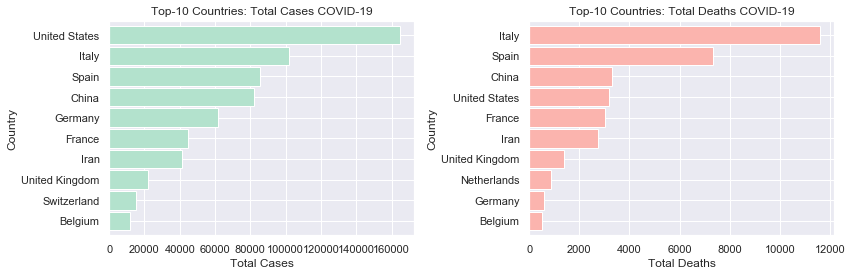

In [10]:
sns.set(rc={'figure.figsize':(12, 4)})

plt.subplot(1, 2, 1)

list_total_cases = df.groupby('location').new_cases.sum().sort_values(ascending=False)
top_total_cases = list_total_cases.drop('World')
top_ten_total_cases = top_total_cases.head(10)
top_ten_total_cases.plot(kind='barh', width=0.9, cmap='Pastel2')
plt.ylabel('Country')
plt.xlabel('Total Cases')
plt.title('Top-10 Countries: Total Cases COVID-19', fontsize=12)
plt.gca().invert_yaxis()

plt.subplot(1, 2, 2)

list_total_deaths = df.groupby('location').new_deaths.sum().sort_values(ascending=False)
top_total_deaths = list_total_deaths.drop('World')
top_ten_total_deaths = top_total_deaths.head(10)
top_ten_total_deaths.plot(kind='barh', width=0.9, cmap='Pastel1')
plt.ylabel('Country')
plt.xlabel('Total Deaths')
plt.title('Top-10 Countries: Total Deaths COVID-19', fontsize=12)
plt.gca().invert_yaxis()

plt.tight_layout()

plt.show()